# Simulating Peppered Moths for natural selection using python

This project is going to focus on simulating the famous [peppered moths example for natural selection](https://askabiologist.asu.edu/peppered-moths-game/natural-selection.html) using [Hardy-Weinberg principles](https://en.wikipedia.org/wiki/Hardy%E2%80%93Weinberg_principle).

## Some important background knowledge

### Moths, Genes and Alleles

1. Before the industrial revolution, these peppered moths were originally white. 


2. During the industrial revolution, large amount of pollution caused the environment to be significantly darker and a large number of these peppered moths were observed to be black.


3. After the industrial revolution when the pollution was reduced, this white variant of peppered moths emerged again.

For our example, we are going to deal with genes, more specifically alleles. Alleles can be thought of different forms of the same gene.

Such as, a **gene** can affect the eye colour whereas the **alleles** for this gene can cause your eye colour to be either brown, black, blue, etc.

**Alleles** are not created equal, some can mask the effect of the other allele (_dominant_) and some can **be** masked by another alleles (_recessive_).

Most organisms have two alleles which affect their appearance. In this project, we are going to assume the colour of the peppered moths are controlled by 1 gene and 2 alleles, a dominant variant which codes for **black-body** and a recessive variance which codes for **white-body**.

So assuming the alelle coding for **black-body** is termed A<sub>1</sub> and **white-body** A<sub>2</sub>. By using the concept of dominance, the following gene combinations (genotypes) would result in this particular colour of the moth:


- A<sub>1</sub>A<sub>1</sub>: Black-bodied moth
- A<sub>1</sub>A<sub>2</sub>: Black-bodied moth
- A<sub>2</sub>A<sub>2</sub>: White-bodied moth

### Hardy-Weinberg principles

In order to simplify this project and make it doable for undergraduates, we need to assume this population of peppered moths follows Hardy-Weinberg principles and their assumptions (we are going to relax one of these assumptions later).

The assumptions are as follows:
- No natural selection (All individuals in this population have equal chances to survive)
- No genetic drift (Gene frequencies don't change due to chance)
- No mutations (Alleles effects on the individuals do not change)
- No gene flow (No new individuals immigrating to the population and no individuals will emmigrate out of the population)
- Random mating (All individuals in this population have equal chances to reproduce with one another)

In a population, the frequencies (percentage) of all alleles of a gene is 1.0 (100%). If a gene has 2 alleles (A<sub>1</sub>, A<sub>2</sub>), their frequencies (p, q) would add up to 1.

If the frequency of A<sub>1</sub> is p, and frequency of A<sub>2</sub> is q, we can thus calculate the frequency of different combinations of alleles. The following combinations can be:

- A<sub>1</sub>A<sub>1</sub>
- A<sub>1</sub>A<sub>2</sub>
- A<sub>2</sub>A<sub>2</sub>

Because of the 5th point in the Hardy-Weinberg assumptions, each allele would have a set chance in combining with each other. Hence the frequency of the combination of the alleles can be calculated.

- A<sub>1</sub>A<sub>1</sub>: p*p
- A<sub>1</sub>A<sub>2</sub>: p*q + q*p = 2pq
- A<sub>2</sub>A<sub>2</sub>: q*q

With these background knowledge, this project can now be started proper


## Base Hardy-Weinberg Code

In this base code, we are not going to assume any advantage held by black / white moths as seen in the case study above. This is merely a framework for later.

Before anything, I know that this project requires the packages `numpy`, `matplotlib` and `random` so we are going to import these first

In [7]:
#Import the relevant packages
import numpy as np
import matplotlib.pyplot as plt
import random

We can thus initialise our population of peppered moths to be `population_size` at 1000 individuals and set the genotype frequencies of A<sub>2</sub>A<sub>2</sub> (white-bodied moths, `frac_qq`) to be 0.90 and A<sub>1</sub>A<sub>1</sub> (black-bodied moths, `frac_pp`) to be 0.00 as they do not exist yet.

In [8]:
#init values#
population_size = 1000
frac_qq = 0.90
frac_pp = 0

Using the genotype frequency, the actual number of individuals having specific genotypes can thus be calculated. They are then stored in `n_qq`, `n_pp`, `n_pq`. In this particular code, the assumption of individuals with genotype A<sub>1</sub>A<sub>2</sub> already exist.

In [9]:
n_qq = round(frac_qq*population_size)
n_pp = round(frac_pp*population_size)
n_pq = population_size-n_qq-n_pp

print(f"pp = {n_pp}, qq = {n_qq},pq = {n_pq}")

pp = 0, qq = 900,pq = 100


In order to calculate allelic frequencies in the next generation, the following formula can be used:

$$p = f[A_1 A_1] + \frac{f[A_1 A_2]}{2}$$

$$q = f[A_2 A_2] + \frac{f[A_1 A_2]}{2}$$

$$p^2 = p*p$$

$$q^2 = q*q$$

$$pq = 1 - p^2 - q^2$$

In [10]:
#After 1 generation
frac_p = (n_pp/population_size) + (n_pq/population_size)/2
frac_q = (n_qq/population_size) + (n_pq/population_size)/2

frac_qq = frac_q*frac_q
frac_pp = frac_p*frac_p
frac_pq = 1 - frac_pp - frac_qq

n_qq = round(frac_qq*population_size)
n_pp = round(frac_pp*population_size)
n_pq = population_size-n_qq-n_pp

print(f"pp = {n_pp}, qq = {n_qq},pq = {n_pq}")

pp = 3, qq = 903,pq = 94


### Relaxing the selection assumption

In order to simulate the environment turning black, where the black-bodied moths (A<sub>1</sub>A<sub>1</sub> and A<sub>1</sub>A<sub>2</sub>) are favored to survive over the white-bodied moths (A<sub>2</sub>A<sub>2</sub>). We would need to alter our equations a little bit.

We would need to add in a `Fitness` parameter to allow our A<sub>2</sub>A<sub>2</sub> moths to not reproduce as well as the rest. `s` is going to be a positive number, the higher `s` is the less able the white-bodied moths are able to reproduce!

| Genotype                  |Frequencies|Fitness  |Frequencies after selection|
|---------------------------| --------- | ------- | --------------------------|
| A<sub>1</sub>A<sub>1</sub>| $$p^2$$   |1        |$$p^2$$                    |
| A<sub>1</sub>A<sub>2</sub>| $$2pq$$   |1        |$$2pq$$                    |
| A<sub>2</sub>A<sub>2</sub>| $$q^2$$   |1-s      |$$q^2(1-s)$$               |

However, now that we have changed the frequencies, $$p^2 + 2pq + q^2(1-s) \ne 1$$

We would need to normalise the frequencies:

| Genotype                  |Frequencies after selection|Frequencies after Normalisation|
|---------------------------| --------- | --------------------------|
| A<sub>1</sub>A<sub>1</sub>| $$p^2$$   |$$\frac{p^2}{p^2 + 2pq + q^2(1-s)}$$|
| A<sub>1</sub>A<sub>2</sub>| $$2pq$$   |$$\frac{2pq}{p^2 + 2pq + q^2(1-s)}$$|
| A<sub>2</sub>A<sub>2</sub>| $$q^2(1-s)$$|$$\frac{q^2(1-s)}{p^2 + 2pq + q^2(1-s)}$$|

Simplifying the math would look like so:

| Genotype                  |Frequencies after selection|Frequencies after Normalisation|
|---------------------------| --------- | --------------------------|
| A<sub>1</sub>A<sub>1</sub>| $$p^2$$   |$$\frac{p^2}{1-q^2s}$$|
| A<sub>1</sub>A<sub>2</sub>| $$2pq$$   |$$\frac{2pq}{1-q^2s}$$|
| A<sub>2</sub>A<sub>2</sub>| $$q^2(1-s)$$|$$\frac{q^2(1-s)}{1-q^2s}$$|


So let us initialise the populations again.

In [11]:
#init values#
population_size = 1000
frac_qq = 0.90
frac_pp = 0

n_qq = round(frac_qq*population_size)
n_pp = round(frac_pp*population_size)
n_pq = population_size-n_qq-n_pp

print(f"pp = {n_pp}, qq = {n_qq},pq = {n_pq}")

pp = 0, qq = 900,pq = 100


The way to calculate the allelic frequencies (p and q) are still the same:

In [12]:
#After 1 generation
frac_p = (n_pp/population_size) + (n_pq/population_size)/2
frac_q = (n_qq/population_size) + (n_pq/population_size)/2

the only thing that changed is the genotype frequencies which was derived in the table above. Let us determine `s` as well, we will just set it to be `0.5` first.

In [13]:
s = 0.5

denominator = 1-(frac_q*frac_q*s)

frac_qq = (frac_q*frac_q*(1-s))/denominator
frac_pp = frac_p*frac_p/denominator
frac_pq = 2*frac_p*frac_q / denominator

n_qq = round(frac_qq*population_size)
n_pp = round(frac_pp*population_size)
n_pq = population_size-n_qq-n_pp

print(f"pp = {n_pp}, qq = {n_qq},pq = {n_pq}")

pp = 5, qq = 822,pq = 173


The above result is not quite right. If we run the code block again

In [14]:
#After 1 more generation
frac_p = (n_pp/population_size) + (n_pq/population_size)/2
frac_q = (n_qq/population_size) + (n_pq/population_size)/2

denominator = 1-(frac_q*frac_q*s)

frac_qq = (frac_q*frac_q*(1-s))/denominator
frac_pp = frac_p*frac_p/denominator
frac_pq = 2*frac_p*frac_q / denominator

n_qq = round(frac_qq*population_size)
n_pp = round(frac_pp*population_size)
n_pq = population_size-n_qq-n_pp

print(f"pp = {n_pp}, qq = {n_qq},pq = {n_pq}")

pp = 14, qq = 703,pq = 283


The numbers changed again. This is because the system is not yet at equilibrium. We can now plot a time-series graph to show the change in the population over time! In order to simplify our code, a function was made to house the calculations.

The initial values were once again intialised, except that the mass population of moths are white thus `frac_qq = 0.999`. We can increase the death rate of white moths in black environments as well thus `s = 0.8`.

In [15]:
def calculate(n_pp,n_pq,n_qq,s):
    frac_p = (n_pp/population_size) + (n_pq/population_size)/2
    frac_q = (n_qq/population_size) + (n_pq/population_size)/2

    denominator = 1-(frac_q*frac_q*s)

    frac_qq = (frac_q*frac_q*(1-s))/denominator
    frac_pp = frac_p*frac_p/denominator
    frac_pq = 2*frac_p*frac_q / denominator

    n_qq = round(frac_qq*population_size)
    n_pp = round(frac_pp*population_size)
    n_pq = population_size-n_qq-n_pp
    return [n_pp,n_pq,n_qq]


#init values#
population_size = 1000
frac_qq = 0.999
frac_pp = 0
s = 0.8


n_qq = round(frac_qq*population_size)
n_pp = round(frac_pp*population_size)
n_pq = population_size-n_qq-n_pp

`for` loops were used to iterate through our population and `n_qq_list`, `n_pp_list`, `n_pq_list` were created to house the values of individual genotypes of peppered moths.

In [16]:
t_max = 35 #Set for 35 generations

n_qq_list,n_pp_list,n_pq_list = [],[],[]

#Lets seed the initial populations
n_pp_list.append(n_pp)
n_pq_list.append(n_pq)
n_qq_list.append(n_qq)

for year in range(1,t_max):
    n_pp,n_pq,n_qq = calculate(n_pp,n_pq,n_qq,s)
    
    n_pp_list.append(n_pp)
    n_pq_list.append(n_pq)
    n_qq_list.append(n_qq)

We can now take advantage of these lists to plot. Since we know the list was ran for `t_max` times we can now plot using t_max.

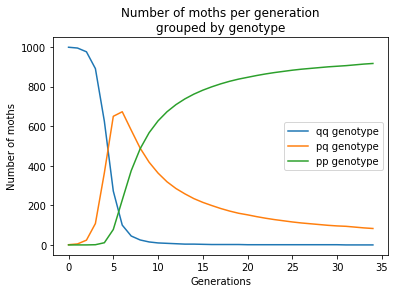

In [17]:
plt.plot(np.arange(0,t_max),n_qq_list, label = 'qq genotype')
plt.plot(np.arange(0,t_max),n_pq_list, label = 'pq genotype')
plt.plot(np.arange(0,t_max),n_pp_list, label = 'pp genotype')


plt.title('Number of moths per generation\ngrouped by genotype')
plt.ylabel('Number of moths')
plt.xlabel('Generations')
plt.legend()
plt.show()


In the natural world, we only care about what we see, in the section **Moths, Genes and Alleles**, both A<sub>1</sub>A<sub>1</sub> and A<sub>1</sub>A<sub>2</sub> would have black bodies. Hence we can condense the two lists into one singular list.

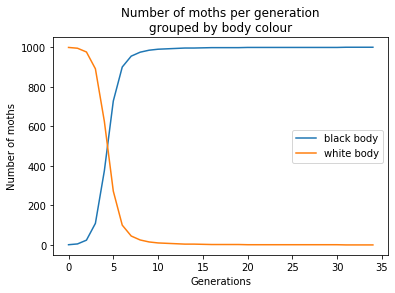

In [18]:
n_black = np.array(n_pp_list) + np.array(n_pq_list)
n_white = np.array(n_qq_list)

plt.plot(np.arange(0,t_max),n_black, label = 'black body')
plt.plot(np.arange(0,t_max),n_white, label = 'white body')

plt.title('Number of moths per generation\ngrouped by body colour')
plt.ylabel('Number of moths')
plt.xlabel('Generations')
plt.legend()
plt.show()

From this graph, we can tell that the population reaches a new equilibrium before generation 20. We can now check numerically, to see in which generation did the populations stabilise.

We can have a threshold of a change of 0.5% (5) moths means it is more or less stabilised.

We can then plot a vertical line in the previous plot to see where it stabilises!

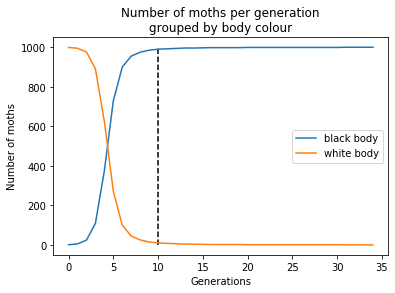

Population Stabilised at generation 10
Black-bodied moths stabilised at 990
White-bodied moths stabilised at 10


In [19]:
threshold = 0.005

for i in range(5,t_max):
    change = n_black[i+1]-n_black[i]
    if threshold*population_size > change:
        break

        
plt.plot(np.arange(0,t_max),n_black, label = 'black body')
plt.plot(np.arange(0,t_max),n_white, label = 'white body')

plt.title('Number of moths per generation\ngrouped by body colour')
plt.ylabel('Number of moths')
plt.xlabel('Generations')
plt.legend()

#Adding vertical line
plt.vlines(i, 0,population_size, linestyles = 'dashed')
plt.show()

print(f'Population Stabilised at generation {i}')
print(f'Black-bodied moths stabilised at {n_black[i]}') 
print(f'White-bodied moths stabilised at {n_white[i]}') 

With this project, we can see how the famous peppered moth example adadpted to change quickly. In a span of <5 generations, the black moths in the population are the majority! And in a span of 10 generations, the black-bodied moths increased from 1 to 990 and the white-bodied moths decreased from 999 to 10!

To make our lives easier, we can house all the code into yet another function.

In [20]:
def full_calc(s, frac_qq, frac_pp, population_size = 1000, t_max = 35, dom = 'black body', recc = 'white body', threshold = 0.005):
    n_qq = round(frac_qq*population_size)
    n_pp = round(frac_pp*population_size)
    n_pq = population_size-n_qq-n_pp

    n_qq_list,n_pp_list,n_pq_list = [],[],[]

    #Lets seed the initial populations
    n_pp_list.append(n_pp)
    n_pq_list.append(n_pq)
    n_qq_list.append(n_qq)

    for year in range(1,t_max):
        n_pp,n_pq,n_qq = calculate(n_pp,n_pq,n_qq,s)

        n_pp_list.append(n_pp)
        n_pq_list.append(n_pq)
        n_qq_list.append(n_qq)
    
    n_black = np.array(n_pp_list) + np.array(n_pq_list)
    n_white = np.array(n_qq_list)
    
    for i in range(t_max,0,-1):
        change = abs(n_black[i-1]-n_black[i-2])
        if threshold*population_size < change:
            break


    plt.plot(np.arange(0,t_max),n_black, label = dom)
    plt.plot(np.arange(0,t_max),n_white, label = recc)

    plt.title('Number of moths per generation\ngrouped by body colour')
    plt.ylabel('Number of moths')
    plt.xlabel('Generations')
    plt.legend()

    #Adding vertical line
    plt.vlines(i, 0,population_size, linestyles = 'dashed')
    plt.show()

    print(f'Population Stabilised at generation {i}')
    print(f'{dom} moths stabilised at {n_black[i]}') 
    print(f'{recc} moths stabilised at {n_white[i]}') 

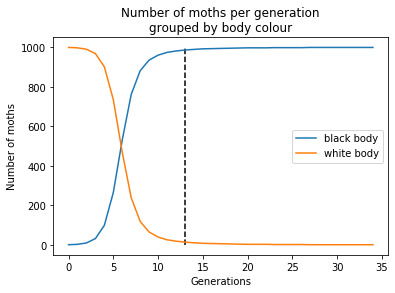

Population Stabilised at generation 13
black body moths stabilised at 986
white body moths stabilised at 14


In [21]:
full_calc(0.7, 0.999, 0, population_size = 1000)

This project assumes that the allele for black-body colour for these moths are dominant, we can further extend this project to see what would have happened if the allele for this black-body was recessive.

#### Assuming the black-bodied moths are recessive in nature

In our previous example, our table looked like

| Genotype                  |Frequencies after selection|Frequencies after Normalisation| Body Colour |
|---------------------------| --------- | --------------------------| ------------------------------- |
| A<sub>1</sub>A<sub>1</sub>| $$p^2$$   |$$\frac{p^2}{1-q^2s}$$| Black |
| A<sub>1</sub>A<sub>2</sub>| $$2pq$$   |$$\frac{2pq}{1-q^2s}$$| Black |
| A<sub>2</sub>A<sub>2</sub>| $$q^2(1-s)$$|$$\frac{q^2(1-s)}{1-q^2s}$$| White |

where `1 > s > 0` to simulate A<sub>2</sub>A<sub>2</sub> (white) being less fit than their black-bodied counterparts. How do we change this table such that A<sub>2</sub>A<sub>2</sub> and A<sub>1</sub>A<sub>2</sub> are white-bodied and A<sub>1</sub>A<sub>1</sub> are black-bodied without making huge changes?

We can just assume A<sub>2</sub>A<sub>2</sub> are for black-bodied moths, A<sub>1</sub>A<sub>2</sub> and A<sub>1</sub>A<sub>1</sub> are for white-bodied moths.

As a result, we can just simulate `s < 0` to show "increased chances of surviving:

| Genotype                  |Frequencies after selection|Frequencies after Normalisation| Body Colour |
|---------------------------| --------- | --------------------------| ------------------------------- |
| A<sub>1</sub>A<sub>1</sub>| $$p^2$$   |$$\frac{p^2}{1-q^2s}$$| White |
| A<sub>1</sub>A<sub>2</sub>| $$2pq$$   |$$\frac{2pq}{1-q^2s}$$| White |
| A<sub>2</sub>A<sub>2</sub>| $$q^2(1-s)$$|$$\frac{q^2(1-s)}{1-q^2s}$$| Black |

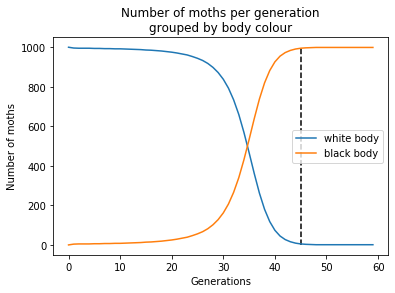

Population Stabilised at generation 45
white body moths stabilised at 5
black body moths stabilised at 995


In [22]:
full_calc(-0.7, 0, 0.9, population_size = 1000, t_max = 60, dom = 'white body', recc = 'black body')

We can compare the same params with this as compared to the other system.

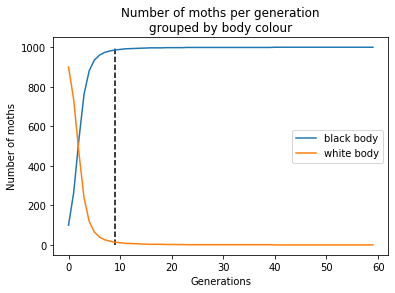

Population Stabilised at generation 9
black body moths stabilised at 986
white body moths stabilised at 14


In [23]:
full_calc(0.7, 0.9, 0, population_size = 1000, t_max = 60, dom = 'black body', recc = 'white body')

We can tell that the "beneficial" allele allows for the population to stabilise early if it is dominant in nature as compared to if it was a recessive system.

If the black-bodied moths were dominant, they stabilised at the 9th generation, whereas if they were recessive, they only stabilised at the 45th generation.

Further extensions to this project can be done, such as simulating codominance of these alleles where A<sub>1</sub>A<sub>2</sub> produces a grey in between rather than a definite black / white body!

## Improving the function to accept multiple fitness values

From our original table:

| Genotype                  |Frequencies after selection|Frequencies after Normalisation|
|---------------------------| --------- | --------------------------|
| A<sub>1</sub>A<sub>1</sub>| $$p^2$$   |$$\frac{p^2}{p^2 + 2pq + q^2(1-s)}$$|
| A<sub>1</sub>A<sub>2</sub>| $$2pq$$   |$$\frac{2pq}{p^2 + 2pq + q^2(1-s)}$$|
| A<sub>2</sub>A<sub>2</sub>| $$q^2(1-s)$$|$$\frac{q^2(1-s)}{p^2 + 2pq + q^2(1-s)}$$|

We assumed only A<sub>2</sub>A<sub>2</sub> and A<sub>2</sub>A<sub>2</sub> have the same fitness values. What if that is not the case? We would need to give each genotype their own fitness values:

| Genotype                  |Frequencies after selection|Frequencies after Normalisation|
|---------------------------| --------- | --------------------------|
| A<sub>1</sub>A<sub>1</sub>| $$p^2(1-s_1)$$   |$$\frac{p^2(1-s_1)}{p^2(1-s_1) + 2pq(1-s_2) + q^2(1-s_3)}$$|
| A<sub>1</sub>A<sub>2</sub>| $$2pq(1-s_2)$$   |$$\frac{2pq(1-s_2)}{p^2(1-s_1) + 2pq(1-s_2) + q^2(1-s_3)}$$|
| A<sub>2</sub>A<sub>2</sub>| $$q^2(1-s_3)$$|$$\frac{q^2(1-s)}{p^2(1-s_1) + 2pq(1-s_2) + q^2(1-s_3)}$$|

The function is now:

In [85]:
def calculate_s3(n_pp,n_pq,n_qq,s1,s2,s3,population_size):
    frac_p = (n_pp/population_size) + (n_pq/population_size)/2
    frac_q = (n_qq/population_size) + (n_pq/population_size)/2

    denominator = ((frac_p**2)*(1-s1)) + (2*frac_p*frac_q*(1-s2)) + ((frac_q**2)*(1-s3))

    frac_qq = (frac_q**2)*(1-s3) / denominator
    frac_pp = (frac_p**2)*(1-s1) / denominator
    frac_pq = (frac_p*frac_q*2)*(1-s2) / denominator

    n_qq = round(frac_qq*population_size)
    n_pp = round(frac_pp*population_size)
    n_pq = population_size-n_qq-n_pp
    return [n_pp,n_pq,n_qq]

def full_calc_3s(frac_qq, frac_pp, s1=0,s2=0,s3=0,population_size = 1000, t_max = 35):
    if frac_qq >= 0.999:
        frac_qq -= 0.05
    if frac_pp >= 0.999:
        frac_pp -= 0.05
    n_qq = round(frac_qq*population_size)
    n_pp = round(frac_pp*population_size)
    n_pq = population_size-n_qq-n_pp

    n_qq_list,n_pp_list,n_pq_list = [],[],[]

    #Lets seed the initial populations
    n_pp_list.append(n_pp)
    n_pq_list.append(n_pq)
    n_qq_list.append(n_qq)

    for year in range(1,t_max):
        n_pp,n_pq,n_qq = calculate_s3(n_pp,n_pq,n_qq,s1,s2,s3,population_size)

        n_pp_list.append(n_pp)
        n_pq_list.append(n_pq)
        n_qq_list.append(n_qq)
    
    n_black = np.array(n_pp_list) + np.array(n_pq_list)
    n_white = np.array(n_qq_list)
    
    return n_black, n_white

With our new function in tow, we are now able to simulate the environment before and during the industrial revolution. This can be done by just setting the `s` for different species.

For the sake of this simulation, we are going to assume a penalty of `s = 0.7` if the background is contrasting.

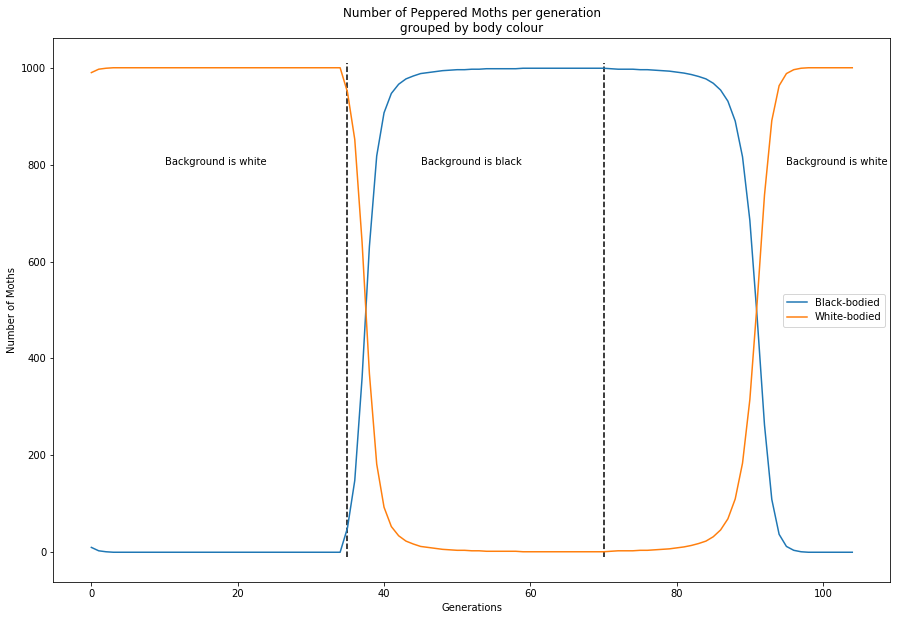

In [86]:
#When bg white#
n_black1, n_white1 = full_calc_3s(0.99, 0, s1=0.7,s2=0.7,s3=0)


#When bg black##
n_black2, n_white2 = full_calc_3s(n_white1[-1]/1000, n_black1[-1]/1000, s1=0,s2=0,s3=0.7)

#When bg white##
n_black3, n_white3 = full_calc_3s(n_white2[-1]/1000, n_black2[-1]/1000, s1=0.7,s2=0.7,s3=0)

#linking all the graphs together
n_black_all = np.concatenate((n_black1, n_black2,n_black3))
n_white_all = np.concatenate((n_white1, n_white2,n_white3))


fig, ax = plt.subplots(figsize=(15,10))
plt.plot(np.arange(0,len(n_black_all)),n_black_all, label = 'Black-bodied')
plt.plot(np.arange(0,len(n_black_all)),n_white_all, label = 'White-bodied')
plt.xlabel('Generations')
plt.ylabel('Number of Moths')
plt.title('Number of Peppered Moths per generation\ngrouped by body colour')
plt.vlines([35,70],[-10,-10],[1010,1010], linestyle = 'dashed')
plt.text(10,800,'Background is white')
plt.text(45,800,'Background is black')
plt.text(95,800,'Background is white')
plt.legend()
plt.show()